In [13]:
pip install "gluonts[mxnet]" 

  Using cached gluonts-0.15.1-py3-none-any.whl.metadata (9.9 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached pandas-2.2.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (19 kB)
  Using cached pydantic-2.9.1-py3-none-any.whl.metadata (146 kB)
  Using cached tqdm-4.66.5-py3-none-any.whl.metadata (57 kB)
  Using cached toolz-0.12.1-py3-none-any.whl.metadata (5.1 kB)
  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
  Using cached mxnet-1.9.1-py3-none-manylinux2014_x86_64.whl.metadata (3.4 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached graphviz-0.8.4-py2.py3-none-any.whl.metadata (6.4 kB)
  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached annotated_types-0.7.0-py3-none-any.whl.metadata (15 kB)
  Using cached 

In [11]:
pip install matplotlib

  Using cached matplotlib-3.9.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached contourpy-1.3.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.53.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (162 kB)
  Using cached kiwisolver-1.4.7-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.3 kB)
  Using cached numpy-2.1.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached pillow-10.4.0-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (9.2 kB)
  Using cached pyparsing-3.1.4-py3-none-any.whl.metadata (5.1 kB)
Using cached matplotlib-3.9.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (8.3 MB)
Using cached contourpy-1.3.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (323 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)


In [12]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
from gluonts.dataset.repository import get_dataset, dataset_names
from gluonts.dataset.util import to_pandas

/home/plealm/Documentos/Unal/Maestria/1_Semestre/Series_Temporales/codigo/acciones/.venv/lib/python3.11/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


In [13]:
print(f"Available datasets: {dataset_names}")

Available datasets: ['constant', 'exchange_rate', 'solar-energy', 'electricity', 'traffic', 'exchange_rate_nips', 'electricity_nips', 'traffic_nips', 'solar_nips', 'wiki2000_nips', 'wiki-rolling_nips', 'taxi_30min', 'kaggle_web_traffic_with_missing', 'kaggle_web_traffic_without_missing', 'kaggle_web_traffic_weekly', 'm1_yearly', 'm1_quarterly', 'm1_monthly', 'nn5_daily_with_missing', 'nn5_daily_without_missing', 'nn5_weekly', 'tourism_monthly', 'tourism_quarterly', 'tourism_yearly', 'cif_2016', 'london_smart_meters_without_missing', 'wind_farms_without_missing', 'car_parts_without_missing', 'dominick', 'fred_md', 'pedestrian_counts', 'hospital', 'covid_deaths', 'kdd_cup_2018_without_missing', 'weather', 'm3_monthly', 'm3_quarterly', 'm3_yearly', 'm3_other', 'm4_hourly', 'm4_daily', 'm4_weekly', 'm4_monthly', 'm4_quarterly', 'm4_yearly', 'm5', 'uber_tlc_daily', 'uber_tlc_hourly', 'airpassengers', 'australian_electricity_demand', 'electricity_hourly', 'electricity_weekly', 'rideshare_wit

In [14]:
dataset = get_dataset("m4_hourly")

/home/plealm/Documentos/Unal/Maestria/1_Semestre/Series_Temporales/codigo/acciones/.venv/lib/python3.11/site-packages/gluonts/dataset/common.py:263: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.Period(val, freq)


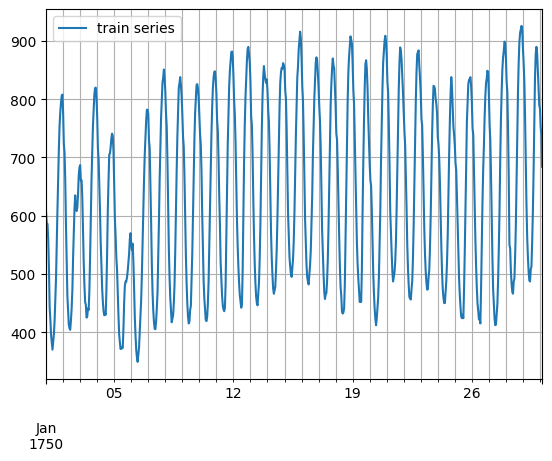

In [15]:
entry = next(iter(dataset.train))
train_series = to_pandas(entry)
train_series.plot()
plt.grid(which="both")
plt.legend(["train series"], loc="upper left")
plt.show()

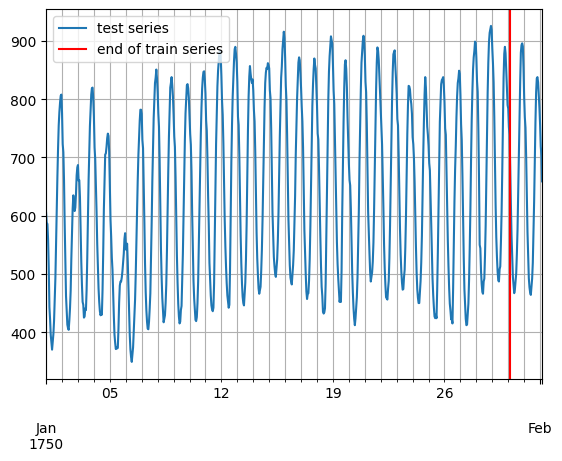

In [16]:
entry = next(iter(dataset.test))
test_series = to_pandas(entry)
test_series.plot()
plt.axvline(train_series.index[-1], color="r")  # end of train dataset
plt.grid(which="both")
plt.legend(["test series", "end of train series"], loc="upper left")
plt.show()

In [17]:
from gluonts.mx import SimpleFeedForwardEstimator, Trainer

estimator = SimpleFeedForwardEstimator(
    num_hidden_dimensions=[10],
    prediction_length=dataset.metadata.prediction_length,
    context_length=100,
    trainer=Trainer(ctx="cpu", epochs=5, learning_rate=1e-3, num_batches_per_epoch=100),
)

In [12]:
from gluonts.evaluation import make_evaluation_predictions

predictor = estimator.train(dataset.train)

forecast_it, ts_it = make_evaluation_predictions(
    dataset=dataset.test,  # test dataset
    predictor=predictor,  # predictor
    num_samples=100,  # number of sample paths we want for evaluation
)

/home/plealm/Documentos/Unal/Maestria/1_Semestre/Series_Temporales/codigo/acciones/.venv/lib/python3.11/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


NameError: name 'estimator' is not defined

In [13]:
forecasts = list(forecast_it)
tss = list(ts_it)

In [16]:
ts_entry = tss[0]
forecast_entry = forecasts[0]

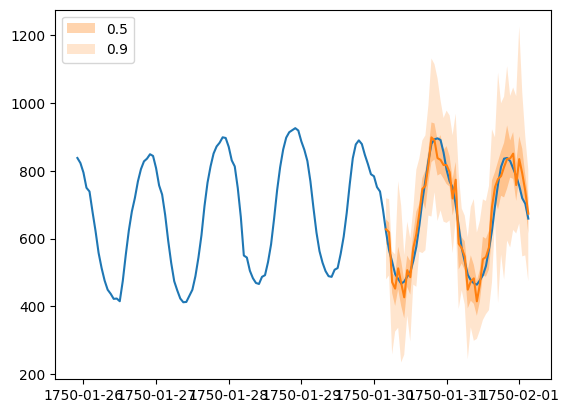

In [17]:
plt.plot(ts_entry[-150:].to_timestamp())
forecast_entry.plot(show_label=True)
plt.legend()

/home/plealm/Documentos/Unal/Maestria/1_Semestre/Series_Temporales/codigo/acciones/.venv/lib/python3.11/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(
/home/plealm/Documentos/Unal/Maestria/1_Semestre/Series_Temporales/codigo/acciones/.venv/lib/python3.11/site-packages/gluonts/dataset/common.py:255: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ProcessDataEntry(to_offset(freq), one_dim_target, use_timestamp),
/home/plealm/Documentos/Unal/Maestria/1_Semestre/Series_Temporales/codigo/acciones/.venv/lib/python3.11/site-packages/gluonts/time_feature/lag.py:104: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  offset = to_offset(freq_str)
/home/plealm/Documentos/Unal/Maestria/1_Semestre/Series_Temporales/codigo/acciones/.venv/lib/python3.11

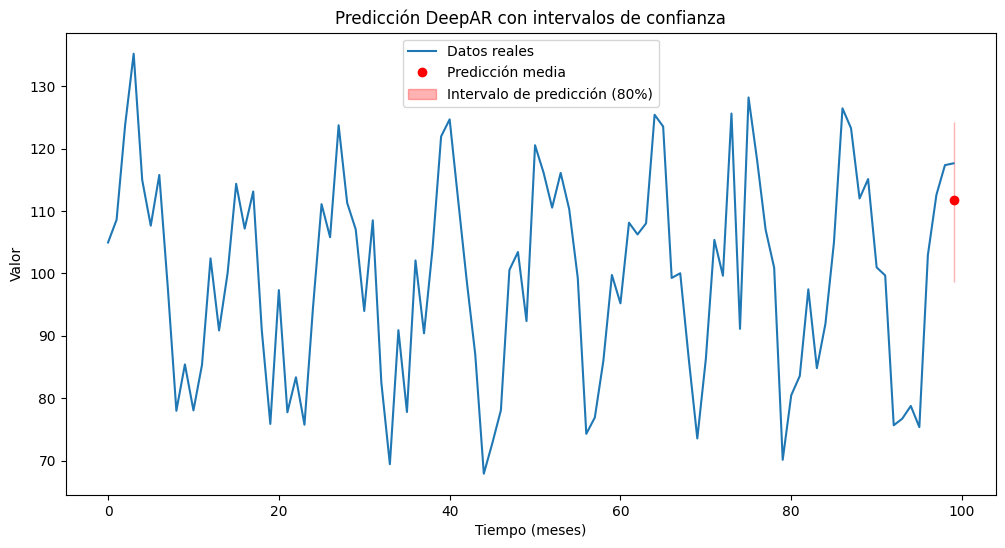

Predicción media: 111.74
Intervalo de predicción (80%): [98.69, 124.24]


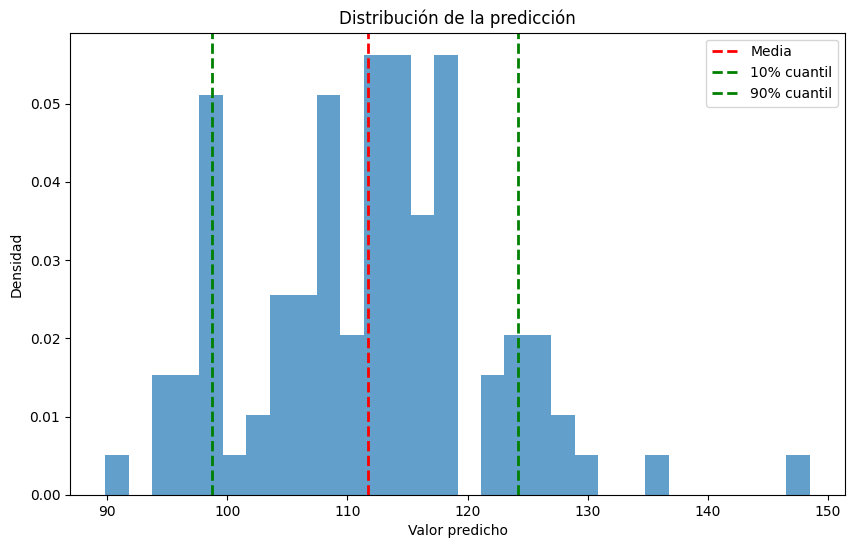

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mxnet as mx
from gluonts.dataset.common import ListDataset
from gluonts.mx.model.deepar import DeepAREstimator
from gluonts.mx.trainer import Trainer
from gluonts.evaluation.backtest import make_evaluation_predictions
# Configurar semilla para reproducibilidad
np.random.seed(42)
mx.random.seed(42)
# Generar serie de tiempo simulada
start_date = pd.Timestamp("2019-01-01")
num_samples = 100
time_series = np.random.normal(loc=100, scale=10, size=num_samples) + \
              np.sin(np.arange(num_samples) * 2 * np.pi / 12) * 20  # Patrón anual
# Crear dataset
train_ds = ListDataset(
    [{"start": start_date, "target": time_series[:-1]}],
    freq="M"
)
# Configurar y entrenar el modelo DeepAR
estimator = DeepAREstimator(
    freq="M",
    prediction_length=1,
    trainer=Trainer(epochs=50, num_batches_per_epoch=100)
)
predictor = estimator.train(train_ds)
# Realizar predicciones
forecast_it, ts_it = make_evaluation_predictions(
    dataset=ListDataset(
        [{"start": start_date, "target": time_series}],
        freq="M"
    ),
    predictor=predictor,
    num_samples=100
)
forecasts = list(forecast_it)
tss = list(ts_it)
# Extraer la media y los intervalos de confianza
mean_forecast = forecasts[0].mean
lower_quantiles = forecasts[0].quantile(0.1)
upper_quantiles = forecasts[0].quantile(0.9)
# Visualizar resultados
plt.figure(figsize=(12, 6))
plt.plot(time_series, label='Datos reales')
plt.plot(range(num_samples-1, num_samples), mean_forecast, 'ro', label='Predicción media')
plt.fill_between([num_samples-1], lower_quantiles, upper_quantiles, color='r', alpha=0.3, label='Intervalo de predicción (80%)')
plt.legend()
plt.title('Predicción DeepAR con intervalos de confianza')
plt.xlabel('Tiempo (meses)')
plt.ylabel('Valor')
plt.show()
# Mostrar predicción probabilística
print(f"Predicción media: {mean_forecast[0]:.2f}")
print(f"Intervalo de predicción (80%): [{lower_quantiles[0]:.2f}, {upper_quantiles[0]:.2f}]")
# Histograma de las muestras de predicción
samples = forecasts[0].samples
plt.figure(figsize=(10, 6))
plt.hist(samples, bins=30, density=True, alpha=0.7)
plt.axvline(mean_forecast[0], color='r', linestyle='dashed', linewidth=2, label='Media')
plt.axvline(lower_quantiles[0], color='g', linestyle='dashed', linewidth=2, label='10% cuantil')
plt.axvline(upper_quantiles[0], color='g', linestyle='dashed', linewidth=2, label='90% cuantil')
plt.title('Distribución de la predicción')
plt.xlabel('Valor predicho')
plt.ylabel('Densidad')
plt.legend()
plt.show()

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from gluonts.dataset.common import ListDataset
from gluonts.dataset.field_names import FieldName
from gluonts.dataset.repository import get_dataset
from gluonts.dataset.util import to_pandas
from gluonts.torch.model.deepar import DeepAREstimator
from gluonts.evaluation.backtest import make_evaluation_predictions
import warnings
from gluonts.evaluation import Evaluator
import scoringrules as sr

warnings.filterwarnings("ignore")

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Load the m4_hourly dataset
dataset = get_dataset("m4_hourly")

# Convert data to pandas DataFrame
train_data = list(dataset.train)
test_data = list(dataset.test)

# Function to split data into train, validation, and test sets
def split_data(data, val_ratio=0.2):
    n = len(data)
    train_end = int(n * (1 - val_ratio))
    return data[:train_end], data[train_end:]

# Split the data
train_val_data, test_data = split_data(train_data + test_data)
train_data, val_data = split_data(train_val_data)

# Create GluonTS datasets
freq = "H"
train_ds = ListDataset([{"start": entry["start"], "target": entry["target"]} for entry in train_data], freq=freq)
val_ds = ListDataset([{"start": entry["start"], "target": entry["target"]} for entry in val_data], freq=freq)
test_ds = ListDataset([{"start": entry["start"], "target": entry["target"]} for entry in test_data], freq=freq)

# Function to train and evaluate the model
def train_and_evaluate(params):
    estimator = DeepAREstimator(
        freq=freq,
        prediction_length=24,
        batch_size=32,
        trainer_kwargs={"max_epochs": params["epochs"]},
        num_layers=params["num_layers"],
        hidden_size=params["hidden_size"]
    )
    predictor = estimator.train(train_ds)
    
    # Evaluate on the validation set
    forecast_it, ts_it = make_evaluation_predictions(val_ds, predictor=predictor, num_samples=100)
    forecasts = list(forecast_it)
    tss = list(ts_it)
    
    evaluator = Evaluator(quantiles=[0.1, 0.5, 0.9])
    agg_metrics, item_metrics = evaluator(tss, forecasts)
    
    return agg_metrics["mean_wQuantileLoss"], predictor

# Hyperparameter search
param_grid = [
    {"epochs": 20, "num_layers": 2, "hidden_size": 32},
    {"epochs": 20, "num_layers": 2, "hidden_size": 64},
    {"epochs": 20, "num_layers": 2, "hidden_size": 128},
    {"epochs": 20, "num_layers": 3, "hidden_size": 32},
    {"epochs": 20, "num_layers": 3, "hidden_size": 64},
    {"epochs": 20, "num_layers": 3, "hidden_size": 128}
]

best_loss = float('inf')
best_params = None
best_predictor = None

for params in param_grid:
    loss, predictor = train_and_evaluate(params)
    if loss < best_loss:
        best_loss = loss
        best_params = params
        best_predictor = predictor

print(f"Best hyperparameters: {best_params}")

# Evaluate on the test set
forecast_it, ts_it = make_evaluation_predictions(test_ds, predictor=best_predictor, num_samples=100)
forecasts = list(forecast_it)
tss = list(ts_it)


/home/plealm/Documentos/Unal/Maestria/1_Semestre/Series_Temporales/codigo/acciones/.venv/lib/python3.11/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(
/home/plealm/Documentos/Unal/Maestria/1_Semestre/Series_Temporales/codigo/acciones/.venv/lib/python3.11/site-packages/torch/cuda/__init__.py:654: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name  | Type        | Params | In sizes                                                      | Out sizes   
---------------------------------------------------------------------------------------------------------------------
0 | model | DeepARModel | 19.0 K | [[1, 1], [1, 1], [1, 744, 5], [1, 744], [1, 744], [1, 24, 5]] | [

Epoch 0: |          | 50/? [00:04<00:00, 11.56it/s, v_num=7, train_loss=6.430]

Epoch 0, global step 50: 'train_loss' reached 6.42580 (best 6.42580), saving model to '/home/plealm/Documentos/Unal/Maestria/1_Semestre/Series_Temporales/codigo/acciones/src/Gluon_TS/lightning_logs/version_7/checkpoints/epoch=0-step=50.ckpt' as top 1


Epoch 1: |          | 50/? [00:04<00:00, 11.73it/s, v_num=7, train_loss=5.620]

Epoch 1, global step 100: 'train_loss' reached 5.61738 (best 5.61738), saving model to '/home/plealm/Documentos/Unal/Maestria/1_Semestre/Series_Temporales/codigo/acciones/src/Gluon_TS/lightning_logs/version_7/checkpoints/epoch=1-step=100.ckpt' as top 1


Epoch 2: |          | 50/? [00:04<00:00, 11.79it/s, v_num=7, train_loss=5.540]

Epoch 2, global step 150: 'train_loss' reached 5.54398 (best 5.54398), saving model to '/home/plealm/Documentos/Unal/Maestria/1_Semestre/Series_Temporales/codigo/acciones/src/Gluon_TS/lightning_logs/version_7/checkpoints/epoch=2-step=150.ckpt' as top 1


Epoch 3: |          | 50/? [00:04<00:00, 11.44it/s, v_num=7, train_loss=5.640]

Epoch 3, global step 200: 'train_loss' was not in top 1


Epoch 4: |          | 50/? [00:04<00:00, 12.15it/s, v_num=7, train_loss=5.250]

Epoch 4, global step 250: 'train_loss' reached 5.25067 (best 5.25067), saving model to '/home/plealm/Documentos/Unal/Maestria/1_Semestre/Series_Temporales/codigo/acciones/src/Gluon_TS/lightning_logs/version_7/checkpoints/epoch=4-step=250.ckpt' as top 1


Epoch 5: |          | 50/? [00:04<00:00, 12.13it/s, v_num=7, train_loss=5.070]

Epoch 5, global step 300: 'train_loss' reached 5.07355 (best 5.07355), saving model to '/home/plealm/Documentos/Unal/Maestria/1_Semestre/Series_Temporales/codigo/acciones/src/Gluon_TS/lightning_logs/version_7/checkpoints/epoch=5-step=300.ckpt' as top 1


Epoch 6: |          | 50/? [00:04<00:00, 11.79it/s, v_num=7, train_loss=4.930]

Epoch 6, global step 350: 'train_loss' reached 4.92975 (best 4.92975), saving model to '/home/plealm/Documentos/Unal/Maestria/1_Semestre/Series_Temporales/codigo/acciones/src/Gluon_TS/lightning_logs/version_7/checkpoints/epoch=6-step=350.ckpt' as top 1


Epoch 7: |          | 50/? [00:04<00:00, 11.86it/s, v_num=7, train_loss=5.060]

Epoch 7, global step 400: 'train_loss' was not in top 1


Epoch 8: |          | 50/? [00:04<00:00, 11.86it/s, v_num=7, train_loss=5.120]

Epoch 8, global step 450: 'train_loss' was not in top 1


Epoch 9: |          | 50/? [00:04<00:00, 11.76it/s, v_num=7, train_loss=5.000]

Epoch 9, global step 500: 'train_loss' was not in top 1


Epoch 10: |          | 50/? [00:04<00:00, 12.19it/s, v_num=7, train_loss=4.650]

Epoch 10, global step 550: 'train_loss' reached 4.64657 (best 4.64657), saving model to '/home/plealm/Documentos/Unal/Maestria/1_Semestre/Series_Temporales/codigo/acciones/src/Gluon_TS/lightning_logs/version_7/checkpoints/epoch=10-step=550.ckpt' as top 1


Epoch 11: |          | 50/? [00:04<00:00, 12.17it/s, v_num=7, train_loss=4.680]

Epoch 11, global step 600: 'train_loss' was not in top 1


Epoch 12: |          | 50/? [00:04<00:00, 11.73it/s, v_num=7, train_loss=4.640]

Epoch 12, global step 650: 'train_loss' reached 4.63801 (best 4.63801), saving model to '/home/plealm/Documentos/Unal/Maestria/1_Semestre/Series_Temporales/codigo/acciones/src/Gluon_TS/lightning_logs/version_7/checkpoints/epoch=12-step=650.ckpt' as top 1


Epoch 13: |          | 50/? [00:04<00:00, 12.10it/s, v_num=7, train_loss=4.580]

Epoch 13, global step 700: 'train_loss' reached 4.58465 (best 4.58465), saving model to '/home/plealm/Documentos/Unal/Maestria/1_Semestre/Series_Temporales/codigo/acciones/src/Gluon_TS/lightning_logs/version_7/checkpoints/epoch=13-step=700.ckpt' as top 1


Epoch 14: |          | 50/? [00:04<00:00, 12.01it/s, v_num=7, train_loss=4.460]

Epoch 14, global step 750: 'train_loss' reached 4.45735 (best 4.45735), saving model to '/home/plealm/Documentos/Unal/Maestria/1_Semestre/Series_Temporales/codigo/acciones/src/Gluon_TS/lightning_logs/version_7/checkpoints/epoch=14-step=750.ckpt' as top 1


Epoch 15: |          | 50/? [00:04<00:00, 11.52it/s, v_num=7, train_loss=4.650]

Epoch 15, global step 800: 'train_loss' was not in top 1


Epoch 16: |          | 50/? [00:04<00:00, 12.06it/s, v_num=7, train_loss=4.580]

Epoch 16, global step 850: 'train_loss' was not in top 1


Epoch 17: |          | 50/? [00:04<00:00, 11.97it/s, v_num=7, train_loss=4.500]

Epoch 17, global step 900: 'train_loss' was not in top 1


Epoch 18: |          | 50/? [00:04<00:00, 11.77it/s, v_num=7, train_loss=4.590]

Epoch 18, global step 950: 'train_loss' was not in top 1


Epoch 19: |          | 50/? [00:04<00:00, 11.77it/s, v_num=7, train_loss=4.530]

Epoch 19, global step 1000: 'train_loss' was not in top 1
`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: |          | 50/? [00:04<00:00, 11.64it/s, v_num=7, train_loss=4.530]


Running evaluation: 133it [00:00, 1027.89it/s]
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name  | Type        | Params | In sizes                                                      | Out sizes   
---------------------------------------------------------------------------------------------------------------------
0 | model | DeepARModel | 62.7 K | [[1, 1], [1, 1], [1, 744, 5], [1, 744], [1, 744], [1, 24, 5]] | [1, 100, 24]
---------------------------------------------------------------------------------------------------------------------
62.7 K    Trainable params
0         Non-trainable params
62.7 K    Total params
0.251     Total estimated model params size (MB)


Epoch 0: |          | 50/? [00:04<00:00, 11.54it/s, v_num=8, train_loss=6.240]

Epoch 0, global step 50: 'train_loss' reached 6.23814 (best 6.23814), saving model to '/home/plealm/Documentos/Unal/Maestria/1_Semestre/Series_Temporales/codigo/acciones/src/Gluon_TS/lightning_logs/version_8/checkpoints/epoch=0-step=50.ckpt' as top 1


Epoch 1: |          | 50/? [00:04<00:00, 11.71it/s, v_num=8, train_loss=5.580]

Epoch 1, global step 100: 'train_loss' reached 5.58035 (best 5.58035), saving model to '/home/plealm/Documentos/Unal/Maestria/1_Semestre/Series_Temporales/codigo/acciones/src/Gluon_TS/lightning_logs/version_8/checkpoints/epoch=1-step=100.ckpt' as top 1


Epoch 2: |          | 50/? [00:04<00:00, 11.42it/s, v_num=8, train_loss=5.290]

Epoch 2, global step 150: 'train_loss' reached 5.28686 (best 5.28686), saving model to '/home/plealm/Documentos/Unal/Maestria/1_Semestre/Series_Temporales/codigo/acciones/src/Gluon_TS/lightning_logs/version_8/checkpoints/epoch=2-step=150.ckpt' as top 1


Epoch 3: |          | 50/? [00:04<00:00, 11.32it/s, v_num=8, train_loss=5.210]

Epoch 3, global step 200: 'train_loss' reached 5.20697 (best 5.20697), saving model to '/home/plealm/Documentos/Unal/Maestria/1_Semestre/Series_Temporales/codigo/acciones/src/Gluon_TS/lightning_logs/version_8/checkpoints/epoch=3-step=200.ckpt' as top 1


Epoch 4: |          | 50/? [00:04<00:00, 11.54it/s, v_num=8, train_loss=4.890]

Epoch 4, global step 250: 'train_loss' reached 4.88597 (best 4.88597), saving model to '/home/plealm/Documentos/Unal/Maestria/1_Semestre/Series_Temporales/codigo/acciones/src/Gluon_TS/lightning_logs/version_8/checkpoints/epoch=4-step=250.ckpt' as top 1


Epoch 5: |          | 50/? [00:04<00:00, 11.18it/s, v_num=8, train_loss=5.490]

Epoch 5, global step 300: 'train_loss' was not in top 1


Epoch 6: |          | 50/? [00:04<00:00, 12.04it/s, v_num=8, train_loss=5.130]

Epoch 6, global step 350: 'train_loss' was not in top 1


Epoch 7: |          | 50/? [00:04<00:00, 11.58it/s, v_num=8, train_loss=5.070]

Epoch 7, global step 400: 'train_loss' was not in top 1


Epoch 8: |          | 50/? [00:04<00:00, 11.49it/s, v_num=8, train_loss=4.710]

Epoch 8, global step 450: 'train_loss' reached 4.70900 (best 4.70900), saving model to '/home/plealm/Documentos/Unal/Maestria/1_Semestre/Series_Temporales/codigo/acciones/src/Gluon_TS/lightning_logs/version_8/checkpoints/epoch=8-step=450.ckpt' as top 1


Epoch 9: |          | 50/? [00:04<00:00, 11.63it/s, v_num=8, train_loss=4.840]

Epoch 9, global step 500: 'train_loss' was not in top 1


Epoch 10: |          | 50/? [00:04<00:00, 11.60it/s, v_num=8, train_loss=4.660]

Epoch 10, global step 550: 'train_loss' reached 4.66113 (best 4.66113), saving model to '/home/plealm/Documentos/Unal/Maestria/1_Semestre/Series_Temporales/codigo/acciones/src/Gluon_TS/lightning_logs/version_8/checkpoints/epoch=10-step=550.ckpt' as top 1


Epoch 11: |          | 50/? [00:04<00:00, 11.42it/s, v_num=8, train_loss=4.670]

Epoch 11, global step 600: 'train_loss' was not in top 1


Epoch 12: |          | 50/? [00:04<00:00, 11.68it/s, v_num=8, train_loss=4.790]

Epoch 12, global step 650: 'train_loss' was not in top 1


Epoch 13: |          | 50/? [00:04<00:00, 11.78it/s, v_num=8, train_loss=4.500]

Epoch 13, global step 700: 'train_loss' reached 4.49693 (best 4.49693), saving model to '/home/plealm/Documentos/Unal/Maestria/1_Semestre/Series_Temporales/codigo/acciones/src/Gluon_TS/lightning_logs/version_8/checkpoints/epoch=13-step=700.ckpt' as top 1


Epoch 14: |          | 50/? [00:04<00:00, 11.44it/s, v_num=8, train_loss=4.480]

Epoch 14, global step 750: 'train_loss' reached 4.48128 (best 4.48128), saving model to '/home/plealm/Documentos/Unal/Maestria/1_Semestre/Series_Temporales/codigo/acciones/src/Gluon_TS/lightning_logs/version_8/checkpoints/epoch=14-step=750.ckpt' as top 1


Epoch 15: |          | 50/? [00:04<00:00, 11.62it/s, v_num=8, train_loss=4.410]

Epoch 15, global step 800: 'train_loss' reached 4.41420 (best 4.41420), saving model to '/home/plealm/Documentos/Unal/Maestria/1_Semestre/Series_Temporales/codigo/acciones/src/Gluon_TS/lightning_logs/version_8/checkpoints/epoch=15-step=800.ckpt' as top 1


Epoch 16: |          | 50/? [00:04<00:00, 11.73it/s, v_num=8, train_loss=4.290]

Epoch 16, global step 850: 'train_loss' reached 4.29243 (best 4.29243), saving model to '/home/plealm/Documentos/Unal/Maestria/1_Semestre/Series_Temporales/codigo/acciones/src/Gluon_TS/lightning_logs/version_8/checkpoints/epoch=16-step=850.ckpt' as top 1


Epoch 17: |          | 50/? [00:04<00:00, 11.48it/s, v_num=8, train_loss=4.740]

Epoch 17, global step 900: 'train_loss' was not in top 1


Epoch 18: |          | 50/? [00:04<00:00, 10.77it/s, v_num=8, train_loss=4.680]

Epoch 18, global step 950: 'train_loss' was not in top 1


Epoch 19: |          | 50/? [00:04<00:00, 10.17it/s, v_num=8, train_loss=4.240]

Epoch 19, global step 1000: 'train_loss' reached 4.23898 (best 4.23898), saving model to '/home/plealm/Documentos/Unal/Maestria/1_Semestre/Series_Temporales/codigo/acciones/src/Gluon_TS/lightning_logs/version_8/checkpoints/epoch=19-step=1000.ckpt' as top 1
`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: |          | 50/? [00:04<00:00, 10.11it/s, v_num=8, train_loss=4.240]


Running evaluation: 133it [00:00, 896.99it/s]
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name  | Type        | Params | In sizes                                                      | Out sizes   
---------------------------------------------------------------------------------------------------------------------
0 | model | DeepARModel | 223 K  | [[1, 1], [1, 1], [1, 744, 5], [1, 744], [1, 744], [1, 24, 5]] | [1, 100, 24]
---------------------------------------------------------------------------------------------------------------------
223 K     Trainable params
0         Non-trainable params
223 K     Total params
0.894     Total estimated model params size (MB)


Epoch 0: |          | 50/? [00:05<00:00,  8.42it/s, v_num=9, train_loss=5.900]

Epoch 0, global step 50: 'train_loss' reached 5.90449 (best 5.90449), saving model to '/home/plealm/Documentos/Unal/Maestria/1_Semestre/Series_Temporales/codigo/acciones/src/Gluon_TS/lightning_logs/version_9/checkpoints/epoch=0-step=50.ckpt' as top 1


Epoch 1: |          | 50/? [00:06<00:00,  8.31it/s, v_num=9, train_loss=5.460]

Epoch 1, global step 100: 'train_loss' reached 5.45610 (best 5.45610), saving model to '/home/plealm/Documentos/Unal/Maestria/1_Semestre/Series_Temporales/codigo/acciones/src/Gluon_TS/lightning_logs/version_9/checkpoints/epoch=1-step=100.ckpt' as top 1


Epoch 2: |          | 50/? [00:06<00:00,  8.32it/s, v_num=9, train_loss=5.310]

Epoch 2, global step 150: 'train_loss' reached 5.31464 (best 5.31464), saving model to '/home/plealm/Documentos/Unal/Maestria/1_Semestre/Series_Temporales/codigo/acciones/src/Gluon_TS/lightning_logs/version_9/checkpoints/epoch=2-step=150.ckpt' as top 1


Epoch 3: |          | 50/? [00:06<00:00,  8.30it/s, v_num=9, train_loss=4.960]

Epoch 3, global step 200: 'train_loss' reached 4.95746 (best 4.95746), saving model to '/home/plealm/Documentos/Unal/Maestria/1_Semestre/Series_Temporales/codigo/acciones/src/Gluon_TS/lightning_logs/version_9/checkpoints/epoch=3-step=200.ckpt' as top 1


Epoch 4: |          | 50/? [00:06<00:00,  8.18it/s, v_num=9, train_loss=5.250]

Epoch 4, global step 250: 'train_loss' was not in top 1


Epoch 5: |          | 50/? [00:06<00:00,  7.91it/s, v_num=9, train_loss=5.450]

Epoch 5, global step 300: 'train_loss' was not in top 1


Epoch 6: |          | 50/? [00:06<00:00,  8.08it/s, v_num=9, train_loss=4.840]

Epoch 6, global step 350: 'train_loss' reached 4.83729 (best 4.83729), saving model to '/home/plealm/Documentos/Unal/Maestria/1_Semestre/Series_Temporales/codigo/acciones/src/Gluon_TS/lightning_logs/version_9/checkpoints/epoch=6-step=350.ckpt' as top 1


Epoch 7: |          | 50/? [00:06<00:00,  8.09it/s, v_num=9, train_loss=4.740]

Epoch 7, global step 400: 'train_loss' reached 4.73902 (best 4.73902), saving model to '/home/plealm/Documentos/Unal/Maestria/1_Semestre/Series_Temporales/codigo/acciones/src/Gluon_TS/lightning_logs/version_9/checkpoints/epoch=7-step=400.ckpt' as top 1


Epoch 8: |          | 50/? [00:06<00:00,  8.05it/s, v_num=9, train_loss=4.720]

Epoch 8, global step 450: 'train_loss' reached 4.71566 (best 4.71566), saving model to '/home/plealm/Documentos/Unal/Maestria/1_Semestre/Series_Temporales/codigo/acciones/src/Gluon_TS/lightning_logs/version_9/checkpoints/epoch=8-step=450.ckpt' as top 1


Epoch 9: |          | 50/? [00:06<00:00,  8.18it/s, v_num=9, train_loss=4.610]

Epoch 9, global step 500: 'train_loss' reached 4.60727 (best 4.60727), saving model to '/home/plealm/Documentos/Unal/Maestria/1_Semestre/Series_Temporales/codigo/acciones/src/Gluon_TS/lightning_logs/version_9/checkpoints/epoch=9-step=500.ckpt' as top 1


Epoch 10: |          | 50/? [00:06<00:00,  7.98it/s, v_num=9, train_loss=4.660]

Epoch 10, global step 550: 'train_loss' was not in top 1


Epoch 11: |          | 50/? [00:06<00:00,  8.10it/s, v_num=9, train_loss=4.520]

Epoch 11, global step 600: 'train_loss' reached 4.52094 (best 4.52094), saving model to '/home/plealm/Documentos/Unal/Maestria/1_Semestre/Series_Temporales/codigo/acciones/src/Gluon_TS/lightning_logs/version_9/checkpoints/epoch=11-step=600.ckpt' as top 1


Epoch 12: |          | 50/? [00:05<00:00,  8.35it/s, v_num=9, train_loss=4.530]

Epoch 12, global step 650: 'train_loss' was not in top 1


Epoch 13: |          | 50/? [00:06<00:00,  7.81it/s, v_num=9, train_loss=4.570]

Epoch 13, global step 700: 'train_loss' was not in top 1


Epoch 14: |          | 50/? [00:06<00:00,  8.25it/s, v_num=9, train_loss=4.630]

Epoch 14, global step 750: 'train_loss' was not in top 1


Epoch 15: |          | 50/? [00:06<00:00,  8.29it/s, v_num=9, train_loss=4.550]

Epoch 15, global step 800: 'train_loss' was not in top 1


Epoch 16: |          | 50/? [00:06<00:00,  8.20it/s, v_num=9, train_loss=4.780]

Epoch 16, global step 850: 'train_loss' was not in top 1


Epoch 17: |          | 50/? [00:06<00:00,  8.25it/s, v_num=9, train_loss=4.300]

Epoch 17, global step 900: 'train_loss' reached 4.29545 (best 4.29545), saving model to '/home/plealm/Documentos/Unal/Maestria/1_Semestre/Series_Temporales/codigo/acciones/src/Gluon_TS/lightning_logs/version_9/checkpoints/epoch=17-step=900.ckpt' as top 1


Epoch 18: |          | 50/? [00:06<00:00,  7.90it/s, v_num=9, train_loss=4.160]

Epoch 18, global step 950: 'train_loss' reached 4.16175 (best 4.16175), saving model to '/home/plealm/Documentos/Unal/Maestria/1_Semestre/Series_Temporales/codigo/acciones/src/Gluon_TS/lightning_logs/version_9/checkpoints/epoch=18-step=950.ckpt' as top 1


Epoch 19: |          | 50/? [00:06<00:00,  8.23it/s, v_num=9, train_loss=4.260]

Epoch 19, global step 1000: 'train_loss' was not in top 1
`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: |          | 50/? [00:06<00:00,  8.16it/s, v_num=9, train_loss=4.260]


Running evaluation: 133it [00:00, 996.08it/s]
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name  | Type        | Params | In sizes                                                      | Out sizes   
---------------------------------------------------------------------------------------------------------------------
0 | model | DeepARModel | 27.5 K | [[1, 1], [1, 1], [1, 744, 5], [1, 744], [1, 744], [1, 24, 5]] | [1, 100, 24]
---------------------------------------------------------------------------------------------------------------------
27.5 K    Trainable params
0         Non-trainable params
27.5 K    Total params
0.110     Total estimated model params size (MB)


Epoch 0: |          | 50/? [00:04<00:00, 12.01it/s, v_num=10, train_loss=6.360]

Epoch 0, global step 50: 'train_loss' reached 6.36386 (best 6.36386), saving model to '/home/plealm/Documentos/Unal/Maestria/1_Semestre/Series_Temporales/codigo/acciones/src/Gluon_TS/lightning_logs/version_10/checkpoints/epoch=0-step=50.ckpt' as top 1


Epoch 1: |          | 50/? [00:04<00:00, 11.83it/s, v_num=10, train_loss=6.000]

Epoch 1, global step 100: 'train_loss' reached 6.00355 (best 6.00355), saving model to '/home/plealm/Documentos/Unal/Maestria/1_Semestre/Series_Temporales/codigo/acciones/src/Gluon_TS/lightning_logs/version_10/checkpoints/epoch=1-step=100.ckpt' as top 1


Epoch 2: |          | 50/? [00:04<00:00, 11.54it/s, v_num=10, train_loss=5.730]

Epoch 2, global step 150: 'train_loss' reached 5.73232 (best 5.73232), saving model to '/home/plealm/Documentos/Unal/Maestria/1_Semestre/Series_Temporales/codigo/acciones/src/Gluon_TS/lightning_logs/version_10/checkpoints/epoch=2-step=150.ckpt' as top 1


Epoch 3: |          | 50/? [00:04<00:00, 11.67it/s, v_num=10, train_loss=5.400]

Epoch 3, global step 200: 'train_loss' reached 5.39621 (best 5.39621), saving model to '/home/plealm/Documentos/Unal/Maestria/1_Semestre/Series_Temporales/codigo/acciones/src/Gluon_TS/lightning_logs/version_10/checkpoints/epoch=3-step=200.ckpt' as top 1


Epoch 4: |          | 50/? [00:04<00:00, 11.89it/s, v_num=10, train_loss=5.390]

Epoch 4, global step 250: 'train_loss' reached 5.39472 (best 5.39472), saving model to '/home/plealm/Documentos/Unal/Maestria/1_Semestre/Series_Temporales/codigo/acciones/src/Gluon_TS/lightning_logs/version_10/checkpoints/epoch=4-step=250.ckpt' as top 1


Epoch 5: |          | 50/? [00:04<00:00, 11.72it/s, v_num=10, train_loss=5.190]

Epoch 5, global step 300: 'train_loss' reached 5.18748 (best 5.18748), saving model to '/home/plealm/Documentos/Unal/Maestria/1_Semestre/Series_Temporales/codigo/acciones/src/Gluon_TS/lightning_logs/version_10/checkpoints/epoch=5-step=300.ckpt' as top 1


Epoch 6: |          | 50/? [00:04<00:00, 11.78it/s, v_num=10, train_loss=5.060]

Epoch 6, global step 350: 'train_loss' reached 5.06079 (best 5.06079), saving model to '/home/plealm/Documentos/Unal/Maestria/1_Semestre/Series_Temporales/codigo/acciones/src/Gluon_TS/lightning_logs/version_10/checkpoints/epoch=6-step=350.ckpt' as top 1


Epoch 7: |          | 50/? [00:04<00:00, 12.05it/s, v_num=10, train_loss=5.170]

Epoch 7, global step 400: 'train_loss' was not in top 1


Epoch 8: |          | 50/? [00:04<00:00, 11.52it/s, v_num=10, train_loss=5.130]

Epoch 8, global step 450: 'train_loss' was not in top 1


Epoch 9: |          | 50/? [00:04<00:00, 11.86it/s, v_num=10, train_loss=4.780]

Epoch 9, global step 500: 'train_loss' reached 4.77906 (best 4.77906), saving model to '/home/plealm/Documentos/Unal/Maestria/1_Semestre/Series_Temporales/codigo/acciones/src/Gluon_TS/lightning_logs/version_10/checkpoints/epoch=9-step=500.ckpt' as top 1


Epoch 10: |          | 50/? [00:04<00:00, 11.80it/s, v_num=10, train_loss=4.880]

Epoch 10, global step 550: 'train_loss' was not in top 1


Epoch 11: |          | 50/? [00:04<00:00, 11.51it/s, v_num=10, train_loss=4.540]

Epoch 11, global step 600: 'train_loss' reached 4.54211 (best 4.54211), saving model to '/home/plealm/Documentos/Unal/Maestria/1_Semestre/Series_Temporales/codigo/acciones/src/Gluon_TS/lightning_logs/version_10/checkpoints/epoch=11-step=600.ckpt' as top 1


Epoch 12: |          | 50/? [00:04<00:00, 11.23it/s, v_num=10, train_loss=4.580]

Epoch 12, global step 650: 'train_loss' was not in top 1


Epoch 13: |          | 50/? [00:04<00:00, 11.79it/s, v_num=10, train_loss=4.570]

Epoch 13, global step 700: 'train_loss' was not in top 1


Epoch 14: |          | 50/? [00:04<00:00, 11.73it/s, v_num=10, train_loss=4.550]

Epoch 14, global step 750: 'train_loss' was not in top 1


Epoch 15: |          | 50/? [00:04<00:00, 11.81it/s, v_num=10, train_loss=4.600]

Epoch 15, global step 800: 'train_loss' was not in top 1


Epoch 16: |          | 50/? [00:04<00:00, 11.83it/s, v_num=10, train_loss=4.660]

Epoch 16, global step 850: 'train_loss' was not in top 1


Epoch 17: |          | 50/? [00:04<00:00, 11.69it/s, v_num=10, train_loss=4.540]

Epoch 17, global step 900: 'train_loss' was not in top 1


Epoch 18: |          | 50/? [00:04<00:00, 11.48it/s, v_num=10, train_loss=4.530]

Epoch 18, global step 950: 'train_loss' reached 4.53298 (best 4.53298), saving model to '/home/plealm/Documentos/Unal/Maestria/1_Semestre/Series_Temporales/codigo/acciones/src/Gluon_TS/lightning_logs/version_10/checkpoints/epoch=18-step=950.ckpt' as top 1


Epoch 19: |          | 50/? [00:04<00:00, 11.94it/s, v_num=10, train_loss=4.460]

Epoch 19, global step 1000: 'train_loss' reached 4.45702 (best 4.45702), saving model to '/home/plealm/Documentos/Unal/Maestria/1_Semestre/Series_Temporales/codigo/acciones/src/Gluon_TS/lightning_logs/version_10/checkpoints/epoch=19-step=1000.ckpt' as top 1
`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: |          | 50/? [00:04<00:00, 11.85it/s, v_num=10, train_loss=4.460]


Running evaluation: 133it [00:00, 1005.94it/s]
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name  | Type        | Params | In sizes                                                      | Out sizes   
---------------------------------------------------------------------------------------------------------------------
0 | model | DeepARModel | 95.9 K | [[1, 1], [1, 1], [1, 744, 5], [1, 744], [1, 744], [1, 24, 5]] | [1, 100, 24]
---------------------------------------------------------------------------------------------------------------------
95.9 K    Trainable params
0         Non-trainable params
95.9 K    Total params
0.384     Total estimated model params size (MB)


Epoch 0: |          | 50/? [00:04<00:00, 10.68it/s, v_num=11, train_loss=6.110]

Epoch 0, global step 50: 'train_loss' reached 6.10671 (best 6.10671), saving model to '/home/plealm/Documentos/Unal/Maestria/1_Semestre/Series_Temporales/codigo/acciones/src/Gluon_TS/lightning_logs/version_11/checkpoints/epoch=0-step=50.ckpt' as top 1


Epoch 1: |          | 50/? [00:04<00:00, 10.65it/s, v_num=11, train_loss=5.840]

Epoch 1, global step 100: 'train_loss' reached 5.84458 (best 5.84458), saving model to '/home/plealm/Documentos/Unal/Maestria/1_Semestre/Series_Temporales/codigo/acciones/src/Gluon_TS/lightning_logs/version_11/checkpoints/epoch=1-step=100.ckpt' as top 1


Epoch 2: |          | 50/? [00:04<00:00, 10.54it/s, v_num=11, train_loss=5.500]

Epoch 2, global step 150: 'train_loss' reached 5.50257 (best 5.50257), saving model to '/home/plealm/Documentos/Unal/Maestria/1_Semestre/Series_Temporales/codigo/acciones/src/Gluon_TS/lightning_logs/version_11/checkpoints/epoch=2-step=150.ckpt' as top 1


Epoch 3: |          | 50/? [00:04<00:00, 10.09it/s, v_num=11, train_loss=5.140]

Epoch 3, global step 200: 'train_loss' reached 5.14426 (best 5.14426), saving model to '/home/plealm/Documentos/Unal/Maestria/1_Semestre/Series_Temporales/codigo/acciones/src/Gluon_TS/lightning_logs/version_11/checkpoints/epoch=3-step=200.ckpt' as top 1


Epoch 4: |          | 50/? [00:04<00:00, 10.70it/s, v_num=11, train_loss=4.940]

Epoch 4, global step 250: 'train_loss' reached 4.94229 (best 4.94229), saving model to '/home/plealm/Documentos/Unal/Maestria/1_Semestre/Series_Temporales/codigo/acciones/src/Gluon_TS/lightning_logs/version_11/checkpoints/epoch=4-step=250.ckpt' as top 1


Epoch 5: |          | 50/? [00:04<00:00, 10.46it/s, v_num=11, train_loss=4.980]

Epoch 5, global step 300: 'train_loss' was not in top 1


Epoch 6: |          | 50/? [00:04<00:00, 10.29it/s, v_num=11, train_loss=4.900]

Epoch 6, global step 350: 'train_loss' reached 4.90029 (best 4.90029), saving model to '/home/plealm/Documentos/Unal/Maestria/1_Semestre/Series_Temporales/codigo/acciones/src/Gluon_TS/lightning_logs/version_11/checkpoints/epoch=6-step=350.ckpt' as top 1


Epoch 7: |          | 50/? [00:04<00:00, 10.51it/s, v_num=11, train_loss=4.770]

Epoch 7, global step 400: 'train_loss' reached 4.77169 (best 4.77169), saving model to '/home/plealm/Documentos/Unal/Maestria/1_Semestre/Series_Temporales/codigo/acciones/src/Gluon_TS/lightning_logs/version_11/checkpoints/epoch=7-step=400.ckpt' as top 1


Epoch 8: |          | 50/? [00:05<00:00,  9.20it/s, v_num=11, train_loss=4.680]

Epoch 8, global step 450: 'train_loss' reached 4.68126 (best 4.68126), saving model to '/home/plealm/Documentos/Unal/Maestria/1_Semestre/Series_Temporales/codigo/acciones/src/Gluon_TS/lightning_logs/version_11/checkpoints/epoch=8-step=450.ckpt' as top 1


Epoch 9: |          | 50/? [00:05<00:00,  9.12it/s, v_num=11, train_loss=4.740]

Epoch 9, global step 500: 'train_loss' was not in top 1


Epoch 10: |          | 50/? [00:05<00:00,  9.52it/s, v_num=11, train_loss=4.520]

Epoch 10, global step 550: 'train_loss' reached 4.52249 (best 4.52249), saving model to '/home/plealm/Documentos/Unal/Maestria/1_Semestre/Series_Temporales/codigo/acciones/src/Gluon_TS/lightning_logs/version_11/checkpoints/epoch=10-step=550.ckpt' as top 1


Epoch 11: |          | 50/? [00:04<00:00, 10.07it/s, v_num=11, train_loss=4.530]

Epoch 11, global step 600: 'train_loss' was not in top 1


Epoch 12: |          | 50/? [00:04<00:00, 10.02it/s, v_num=11, train_loss=4.780]

Epoch 12, global step 650: 'train_loss' was not in top 1


Epoch 13: |          | 50/? [00:04<00:00, 10.24it/s, v_num=11, train_loss=4.610]

Epoch 13, global step 700: 'train_loss' was not in top 1


Epoch 14: |          | 50/? [00:05<00:00,  9.59it/s, v_num=11, train_loss=4.710]

Epoch 14, global step 750: 'train_loss' was not in top 1


Epoch 15: |          | 50/? [00:05<00:00,  9.75it/s, v_num=11, train_loss=4.390]

Epoch 15, global step 800: 'train_loss' reached 4.38718 (best 4.38718), saving model to '/home/plealm/Documentos/Unal/Maestria/1_Semestre/Series_Temporales/codigo/acciones/src/Gluon_TS/lightning_logs/version_11/checkpoints/epoch=15-step=800.ckpt' as top 1


Epoch 16: |          | 50/? [00:05<00:00,  8.43it/s, v_num=11, train_loss=4.580]

Epoch 16, global step 850: 'train_loss' was not in top 1


Epoch 17: |          | 50/? [00:05<00:00,  9.68it/s, v_num=11, train_loss=4.500]

Epoch 17, global step 900: 'train_loss' was not in top 1


Epoch 18: |          | 50/? [00:05<00:00,  9.74it/s, v_num=11, train_loss=4.470]

Epoch 18, global step 950: 'train_loss' was not in top 1


Epoch 19: |          | 50/? [00:05<00:00,  9.47it/s, v_num=11, train_loss=4.430]

Epoch 19, global step 1000: 'train_loss' was not in top 1
`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: |          | 50/? [00:05<00:00,  9.44it/s, v_num=11, train_loss=4.430]


Running evaluation: 133it [00:00, 787.41it/s]
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name  | Type        | Params | In sizes                                                      | Out sizes   
---------------------------------------------------------------------------------------------------------------------
0 | model | DeepARModel | 355 K  | [[1, 1], [1, 1], [1, 744, 5], [1, 744], [1, 744], [1, 24, 5]] | [1, 100, 24]
---------------------------------------------------------------------------------------------------------------------
355 K     Trainable params
0         Non-trainable params
355 K     Total params
1.423     Total estimated model params size (MB)


Epoch 0: |          | 50/? [00:07<00:00,  6.98it/s, v_num=12, train_loss=5.990]

Epoch 0, global step 50: 'train_loss' reached 5.98590 (best 5.98590), saving model to '/home/plealm/Documentos/Unal/Maestria/1_Semestre/Series_Temporales/codigo/acciones/src/Gluon_TS/lightning_logs/version_12/checkpoints/epoch=0-step=50.ckpt' as top 1


Epoch 1: |          | 50/? [00:07<00:00,  6.86it/s, v_num=12, train_loss=5.500]

Epoch 1, global step 100: 'train_loss' reached 5.50191 (best 5.50191), saving model to '/home/plealm/Documentos/Unal/Maestria/1_Semestre/Series_Temporales/codigo/acciones/src/Gluon_TS/lightning_logs/version_12/checkpoints/epoch=1-step=100.ckpt' as top 1


Epoch 2: |          | 50/? [00:07<00:00,  6.79it/s, v_num=12, train_loss=5.420]

Epoch 2, global step 150: 'train_loss' reached 5.41827 (best 5.41827), saving model to '/home/plealm/Documentos/Unal/Maestria/1_Semestre/Series_Temporales/codigo/acciones/src/Gluon_TS/lightning_logs/version_12/checkpoints/epoch=2-step=150.ckpt' as top 1


Epoch 3: |          | 50/? [00:07<00:00,  6.76it/s, v_num=12, train_loss=5.370]

Epoch 3, global step 200: 'train_loss' reached 5.36691 (best 5.36691), saving model to '/home/plealm/Documentos/Unal/Maestria/1_Semestre/Series_Temporales/codigo/acciones/src/Gluon_TS/lightning_logs/version_12/checkpoints/epoch=3-step=200.ckpt' as top 1


Epoch 4: |          | 50/? [00:07<00:00,  6.82it/s, v_num=12, train_loss=5.000]

Epoch 4, global step 250: 'train_loss' reached 4.99958 (best 4.99958), saving model to '/home/plealm/Documentos/Unal/Maestria/1_Semestre/Series_Temporales/codigo/acciones/src/Gluon_TS/lightning_logs/version_12/checkpoints/epoch=4-step=250.ckpt' as top 1


Epoch 5: |          | 50/? [00:07<00:00,  6.75it/s, v_num=12, train_loss=4.890]

Epoch 5, global step 300: 'train_loss' reached 4.89176 (best 4.89176), saving model to '/home/plealm/Documentos/Unal/Maestria/1_Semestre/Series_Temporales/codigo/acciones/src/Gluon_TS/lightning_logs/version_12/checkpoints/epoch=5-step=300.ckpt' as top 1


Epoch 6: |          | 50/? [00:07<00:00,  6.74it/s, v_num=12, train_loss=4.960]

Epoch 6, global step 350: 'train_loss' was not in top 1


Epoch 7: |          | 50/? [00:07<00:00,  6.75it/s, v_num=12, train_loss=4.850]

Epoch 7, global step 400: 'train_loss' reached 4.85467 (best 4.85467), saving model to '/home/plealm/Documentos/Unal/Maestria/1_Semestre/Series_Temporales/codigo/acciones/src/Gluon_TS/lightning_logs/version_12/checkpoints/epoch=7-step=400.ckpt' as top 1


Epoch 8: |          | 50/? [00:07<00:00,  6.63it/s, v_num=12, train_loss=4.770]

Epoch 8, global step 450: 'train_loss' reached 4.77165 (best 4.77165), saving model to '/home/plealm/Documentos/Unal/Maestria/1_Semestre/Series_Temporales/codigo/acciones/src/Gluon_TS/lightning_logs/version_12/checkpoints/epoch=8-step=450.ckpt' as top 1


Epoch 9: |          | 50/? [00:07<00:00,  6.82it/s, v_num=12, train_loss=4.530]

Epoch 9, global step 500: 'train_loss' reached 4.52839 (best 4.52839), saving model to '/home/plealm/Documentos/Unal/Maestria/1_Semestre/Series_Temporales/codigo/acciones/src/Gluon_TS/lightning_logs/version_12/checkpoints/epoch=9-step=500.ckpt' as top 1


Epoch 10: |          | 50/? [00:07<00:00,  6.87it/s, v_num=12, train_loss=4.700]

Epoch 10, global step 550: 'train_loss' was not in top 1


Epoch 11: |          | 50/? [00:07<00:00,  6.69it/s, v_num=12, train_loss=4.530]

Epoch 11, global step 600: 'train_loss' was not in top 1


Epoch 12: |          | 50/? [00:07<00:00,  7.03it/s, v_num=12, train_loss=4.450]

Epoch 12, global step 650: 'train_loss' reached 4.45159 (best 4.45159), saving model to '/home/plealm/Documentos/Unal/Maestria/1_Semestre/Series_Temporales/codigo/acciones/src/Gluon_TS/lightning_logs/version_12/checkpoints/epoch=12-step=650.ckpt' as top 1


Epoch 13: |          | 50/? [00:06<00:00,  7.70it/s, v_num=12, train_loss=4.510]

Epoch 13, global step 700: 'train_loss' was not in top 1


Epoch 14: |          | 50/? [00:06<00:00,  7.65it/s, v_num=12, train_loss=4.290]

Epoch 14, global step 750: 'train_loss' reached 4.29465 (best 4.29465), saving model to '/home/plealm/Documentos/Unal/Maestria/1_Semestre/Series_Temporales/codigo/acciones/src/Gluon_TS/lightning_logs/version_12/checkpoints/epoch=14-step=750.ckpt' as top 1


Epoch 15: |          | 50/? [00:06<00:00,  7.96it/s, v_num=12, train_loss=4.530]

Epoch 15, global step 800: 'train_loss' was not in top 1


Epoch 16: |          | 50/? [00:06<00:00,  7.68it/s, v_num=12, train_loss=4.470]

Epoch 16, global step 850: 'train_loss' was not in top 1


Epoch 17: |          | 50/? [00:06<00:00,  7.84it/s, v_num=12, train_loss=4.480]

Epoch 17, global step 900: 'train_loss' was not in top 1


Epoch 18: |          | 50/? [00:06<00:00,  7.71it/s, v_num=12, train_loss=4.410]

Epoch 18, global step 950: 'train_loss' was not in top 1


Epoch 19: |          | 50/? [00:06<00:00,  7.91it/s, v_num=12, train_loss=4.360]

Epoch 19, global step 1000: 'train_loss' was not in top 1
`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: |          | 50/? [00:06<00:00,  7.88it/s, v_num=12, train_loss=4.360]


Running evaluation: 133it [00:00, 921.95it/s]


Best hyperparameters: {'epochs': 20, 'num_layers': 2, 'hidden_size': 128}


KeyError: 'target'

<Figure size 1200x600 with 0 Axes>

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from gluonts.dataset.util import to_pandas
import scoringrules as sr

def safe_to_pandas(ts):
    try:
        return to_pandas(ts)
    except KeyError as e:
        return None

# Evaluate on the test set
forecast_it, ts_it = make_evaluation_predictions(test_ds, predictor=best_predictor, num_samples=100)
forecasts = list(forecast_it)
tss = list(ts_it)

# Visualize results and calculate CRPS
all_crps = []

def process_ts(ts):
    item_id = ts.item_id
    start_date = ts.start_date
    target = ts.target
    
    # Create a date range
    date_range = pd.date_range(start=start_date, periods=len(target), freq=freq)
    
    # Create a DataFrame
    df = pd.DataFrame({'date': date_range, 'value': target})
    df.set_index('date', inplace=True)
    
    return df

# Visualize results and calculate CRPS
all_crps = []
for i, (forecast, ts) in enumerate(zip(forecasts, tss)):
    test_series = process_ts(ts)
    
    plt.figure(figsize=(12, 6))
    
    # Actual data
    plt.plot(test_series.index, test_series.values, label='Actual data')
    
    # Mean forecast and confidence intervals
    mean_forecast = forecast.mean
    lower_quantiles = forecast.quantile(0.1)
    upper_quantiles = forecast.quantile(0.9)
    
    forecast_index = pd.date_range(test_series.index[-1] + pd.Timedelta(hours=1), periods=len(mean_forecast), freq=freq)
    plt.plot(forecast_index, mean_forecast, 'r-', label='Mean forecast')
    plt.fill_between(forecast_index, lower_quantiles, upper_quantiles, color='r', alpha=0.3, label='Prediction interval (80%)')
    
    plt.legend()
    plt.title(f'DeepAR Prediction for series {i+1}')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.show()
    
    # Histogram of prediction samples
    plt.figure(figsize=(10, 6))
    plt.hist(forecast.samples[:, -1], bins=30, density=True, alpha=0.7)
    plt.axvline(mean_forecast[-1], color='r', linestyle='dashed', linewidth=2, label='Mean')
    plt.axvline(lower_quantiles[-1], color='g', linestyle='dashed', linewidth=2, label='10% quantile')
    plt.axvline(upper_quantiles[-1], color='g', linestyle='dashed', linewidth=2, label='90% quantile')
    plt.title(f'Prediction distribution for series {i+1}')
    plt.xlabel('Predicted value')
    plt.ylabel('Density')
    plt.legend()
    plt.show()
    
    # Calculate CRPS
    observations = test_series.values[-len(mean_forecast):]
    forecast_ensemble = pd.DataFrame(forecast.samples.T)
    crps = sr.crps_ensemble(observations, forecast_ensemble.values).mean()
    print(f"CRPS for series {i+1}: {crps:.4f}")
    all_crps.append(crps)
    
    if i == 4:  # Limit to 5 series to avoid generating too many plots
        break

# Calculate average CRPS
if all_crps:
    print(f"Average CRPS on the test set: {np.mean(all_crps):.4f}")
else:
    print("No valid CRPS scores were calculated.")

AttributeError: 'DataFrame' object has no attribute 'item_id'